#  환경설정(폰트 설정)
* https://seaborn.pydata.org/examples/anscombes_quartet.html

In [3]:
import warnings, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from seaborn import load_dataset
from matplotlib import font_manager, rcParams
warnings.filterwarnings("ignore")

candidates = ["Malgun Gothic", "AppleGothic", "NanumGothic", "Noto Sans CJK KR"]
avail = {f.name for f in font_manager.fontManager.ttflist}
for name in candidates:
    if name in avail:
        rcParams["font.family"] = name
        break
rcParams["axes.unicode_minus"] = False

print("Font set to:", rcParams["font.family"])
print("Seaborn:", sns.__version__)

Font set to: ['Malgun Gothic']
Seaborn: 0.13.2


In [4]:
DATASETS = ["tips", "penguins", "flights", "iris", "car_crashes", "exercise"]
data = {name: load_dataset(name) for name in DATASETS}

In [5]:
data

{'tips':      total_bill   tip     sex smoker   day    time  size
 0         16.99  1.01  Female     No   Sun  Dinner     2
 1         10.34  1.66    Male     No   Sun  Dinner     3
 2         21.01  3.50    Male     No   Sun  Dinner     3
 3         23.68  3.31    Male     No   Sun  Dinner     2
 4         24.59  3.61  Female     No   Sun  Dinner     4
 ..          ...   ...     ...    ...   ...     ...   ...
 239       29.03  5.92    Male     No   Sat  Dinner     3
 240       27.18  2.00  Female    Yes   Sat  Dinner     2
 241       22.67  2.00    Male    Yes   Sat  Dinner     2
 242       17.82  1.75    Male     No   Sat  Dinner     2
 243       18.78  3.00  Female     No  Thur  Dinner     2
 
 [244 rows x 7 columns],
 'penguins':     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
 0    Adelie  Torgersen            39.1           18.7              181.0   
 1    Adelie  Torgersen            39.5           17.4              186.0   
 2    Adelie  Torgersen   

# TIPs 데이터로 분포, 범주형 비교
* 식당 팁 지출 데이터

In [7]:
tips = data['tips'].copy()
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [10]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


# histplot - 히스토그램(막대 분포도)
* 목적(무엇을 보나): 값이 어느 구간에 많이 몰렸는지, 치우침/꼬리/이상치 감지.
* 언제 쓰나: 연속형/이산형 분포의 첫 관찰.
* 핵심 옵션
    * bins(막대 수), binwidth(구간 너비), binrange(범위)
    * stat: "count"|"probability"|"density" (밀도 비교 시 density)
    * multiple: "layer"|"stack"|"fill" (그룹 비교)
    * kde=True(KDE 라인 같이 표시)

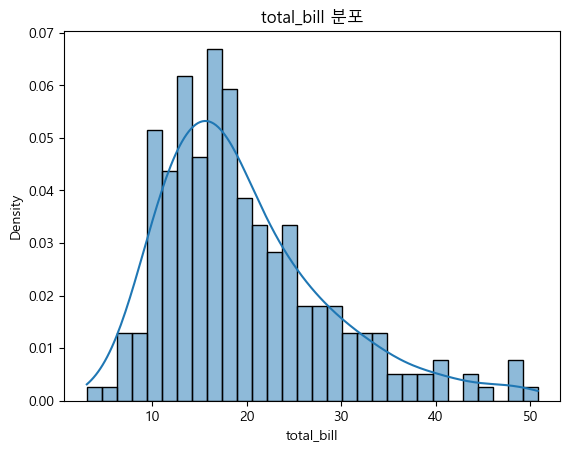

In [13]:
plt.figure()
sns.histplot(tips['total_bill'],bins = 30, stat='density',kde=True) # kde그래프의 선
plt.title('total_bill 분포')
plt.show()

# kdeplot - 커널 밀도 추정 그래프(KDE)
* 목적: 히스토그램보다 부드러운 분포 형태 파악 (봉우리/꼬리).
* 언제: 샘플이 충분하고 분포 형태 자체가 관심일 때.
* 핵심 옵션  
    * fill=True(면적 채우기), bw_adjust(대역폭; 작으면 세밀, 크면 매끈)
    * common_norm(여러 그룹 비교 시 정규화 방식)

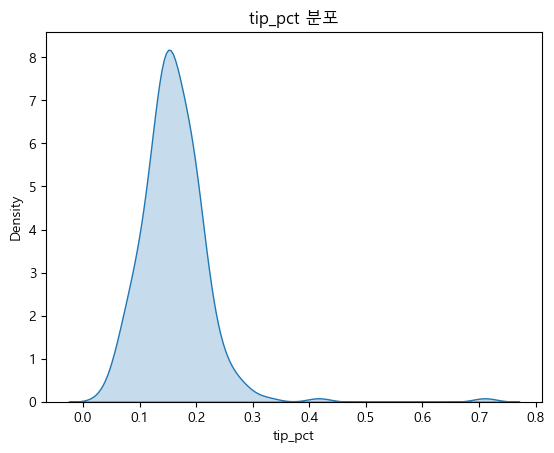

In [19]:
plt.figure()
sns.kdeplot(tips['tip_pct'],fill=True,bw_adjust=1.0)
plt.title('tip_pct 분포')
plt.show()

# ecdfplot — 경험적 누적분포 함수(ECDF)
* 목적: “x 이하의 누적 비율”을 바로 읽음(분위수·중위수 판단 용이).
* 언제: “50%가 얼마 이하?”, “상위 10% 컷?”처럼 백분위/분위수가 궁금할 때.
* 핵심 옵션
    * complementary=True(1−ECDF, 역누적)
    * hue(그룹별 누적곡선 비교)

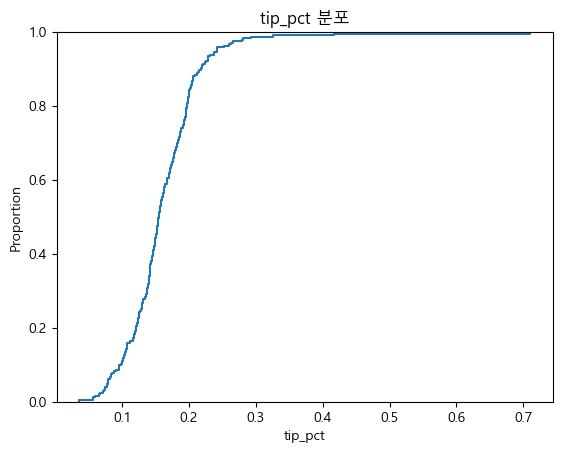

In [21]:
plt.figure()
sns.ecdfplot(tips['tip_pct'])
plt.title('tip_pct 분포')
plt.show()

# barplot
* 목적:
    * 범주형 변수(day)별로 연속형 값(tip_pct)의 평균(혹은 다른 통계량) 을 막대로 표현하는 그래프입니다.
    * 즉, “요일별 평균 팁 비율이 얼마나 다른가?” 를 시각적으로 비교하기 위한 요약 통계형 막대그래프입니다.
* 언제:
    * 그룹별 평균값, 중앙값, 합계 등을 비교할 때
    * 단순 빈도(countplot)가 아닌 집계된 값의 차이를 보고 싶을 때
    * 그룹 간 차이의 대략적인 경향을 파악할 때
* errorbar (오차막대)란?
    * 막대 위아래의 가늘고 짧은 선(line)
    * 데이터의 변동성(흩어짐 정도) 을 시각적으로 표현
    * 주로 표준편차(sd) 또는 표준오차(se) 또는 신뢰구간(ci) 으로 표시됨

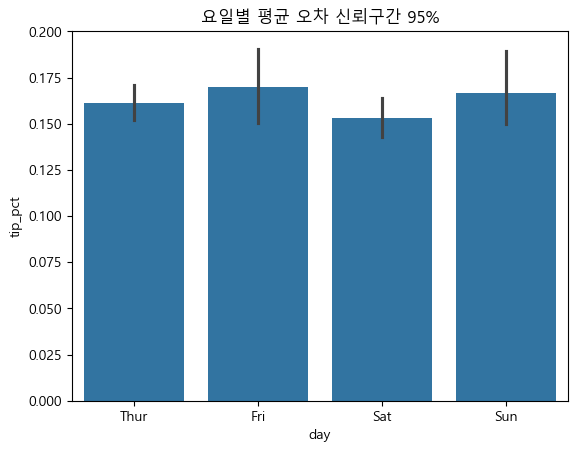

In [23]:
plt.figure()
sns.barplot(data = tips,x = 'day',y = 'tip_pct',estimator=np.mean,errorbar=('ci',95))
plt.title('요일별 평균 오차 신뢰구간 95%')
plt.show()

# boxplot
* 목적:
    * 데이터의 중앙값·사분위수·이상치를 한눈에 보여주는 요약 통계 시각화입니다.
    * 분포의 중심, 퍼짐(분산), 비대칭성, 이상값(outlier)을 간결하게 비교할 수 있습니다.
* 언제:
    * 범주별 분포 비교를 할 때 (예: 요일별, 성별, 그룹별)
    * 평균보다 중앙값 중심의 통계가 중요할 때
    * 이상치 탐색이나 데이터 편향 확인이 필요할 때

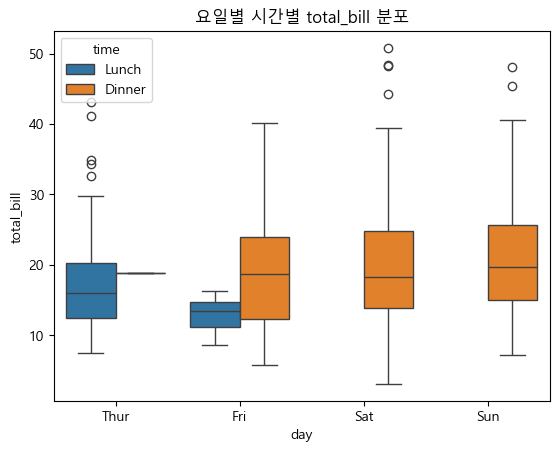

In [25]:
plt.figure()
sns.boxplot(data = tips,x = 'day',y = 'total_bill',hue='time')
plt.title('요일별 시간별 total_bill 분포')
plt.show()

# violinplot
* 목적:
    * 데이터의 분포 형태를 시각적으로 표현하면서,
    * 중앙값(중앙선)과 사분위 범위를 동시에 보여줍니다.
    * 즉, boxplot(상자그림) + KDE(밀도분포)의 결합형 그래프입니다.
    * 이 코드에서는 요일(day)과 식사시간(time)에 따른
    * 총 지출액(total_bill)의 분포를 한눈에 비교합니다.
* 언제:
    * 범주별 분포 비교를 하고 싶을 때
    * 단순 평균/오차막대(barplot)보다 분포의 모양을 강조하고 싶을 때
    * 특히 값이 쌍봉형(두 개의 봉우리) 이거나 비대칭적 분포일 때 유용합니다.
    + split=True를 사용하면 두 그룹(hue)을 한 바이올린 안에서 좌우로 나눠 비교할 수 있습니다.

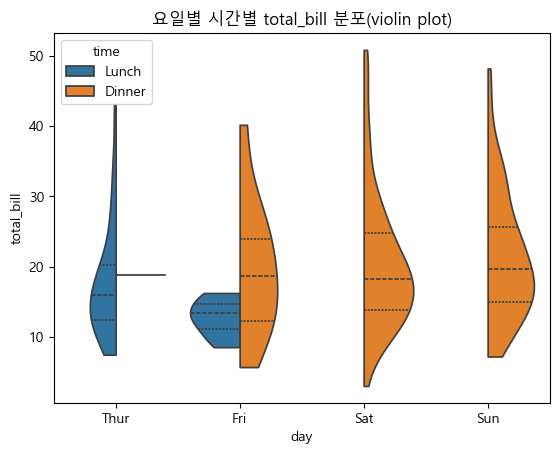

In [27]:
plt.figure()
sns.violinplot(data = tips,x = 'day',y = 'total_bill',hue='time',split=True,cut=0,inner='quartile')
plt.title('요일별 시간별 total_bill 분포(violin plot)')
plt.show()

# stripplot
* 범주형 데이터의 분포 확인
    * “요일별 팁 비율이 어떻게 퍼져 있나?”
    * scatterplot → “팁 비율이 총금액과 어떤 관계가 있나?”

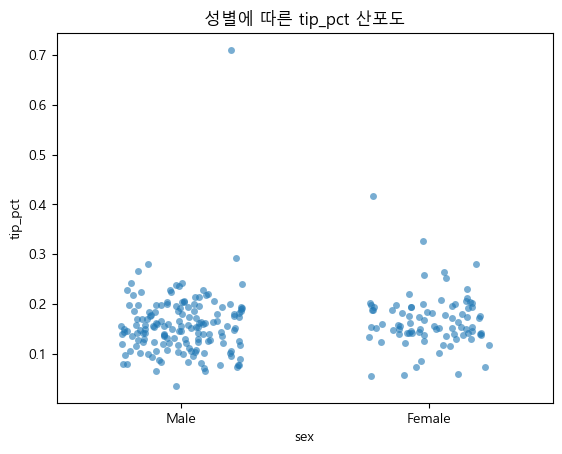

In [28]:
plt.figure()
sns.stripplot(data = tips,x = 'sex',y = 'tip_pct',jitter=0.25,alpha=0.6)
plt.title("성별에 따른 tip_pct 산포도")
plt.show()

# Penguins 데이터로 산점도,회귀,다변량 관계 그래프

In [29]:
pg = data['penguins'].dropna()
pg

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# scatterplot
* 목적
    * 두 연속형 변수 간의 관계(상관관계)를 시각화
    * 데이터가 어떤 패턴을 가지는지,
    * 즉 “부리가 길수

In [30]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

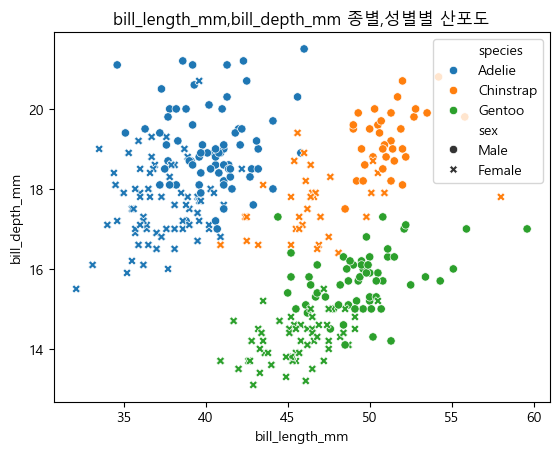

In [31]:
plt.figure()
sns.scatterplot(data = pg,x = 'bill_length_mm',y = 'bill_depth_mm',hue="species",style="sex")
plt.title("bill_length_mm,bill_depth_mm 종별,성별별 산포도")
plt.show()

# lmplot
* 목적
    * 두 연속형 변수 간의 선형 관계(상관관계) 를 보여줍니다.
    * 단순한 점(산점도) 대신 회귀선(추세선) 을 추가해,
    * “x가 증가할 때 y가 어떻게 변하는지”를 직관적으로 파악하게 합니다.

<Figure size 640x480 with 0 Axes>

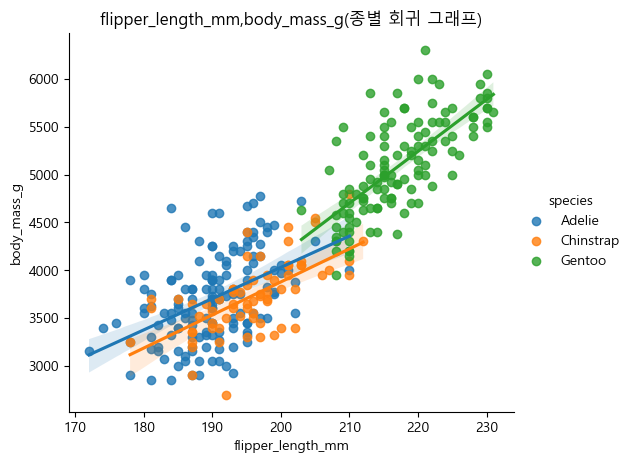

In [32]:
plt.figure()
sns.lmplot(data = pg,x = 'flipper_length_mm',y = 'body_mass_g',hue='species',height = 4.5, aspect=1.2)
plt.title("flipper_length_mm,body_mass_g(종별 회귀 그래프)")
plt.show()

# pairplot
* 목적
    * 여러 연속형 변수들 간의 관계를 한 번에 시각화
    * 산점도(scatterplot) 와 히스토그램(histogram) 이 결합된 형태
    * 변수 간 상관관계 패턴을 빠르게 파악할 수 있음

In [34]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

<Figure size 640x480 with 0 Axes>

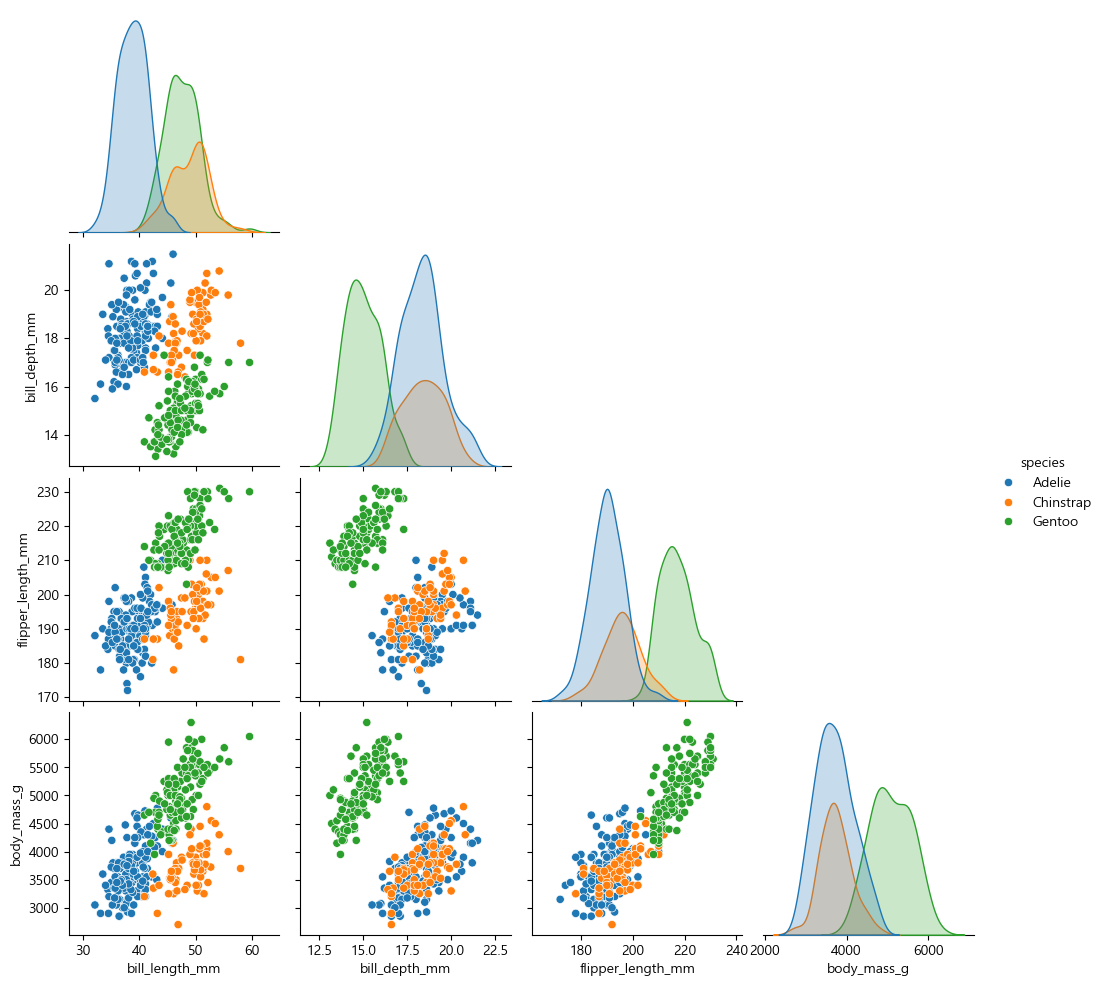

In [35]:
plt.figure()
sns.pairplot(pg[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g','species']],hue='species',corner=True)
#plt.title("")
plt.show()

# Flights 데이터로 시계열 그래프,히트맵

In [44]:
flight = data['flights'].copy()
flight

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [45]:
month_order = list(flight['month'].unique())
month_order

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [48]:
flight['month_num'] = flight['month'].apply(lambda m: month_order.index(m)+1)
flight

,year,month,passengers,month_num
0,1949,Jan,112,1
1,1949,Feb,118,2
2,1949,Mar,132,3
3,1949,Apr,129,4
4,1949,May,121,5
...,...,...,...,...
139,1960,Aug,606,8
140,1960,Sep,508,9
141,1960,Oct,461,10
142,1960,Nov,390,11


In [51]:
flight['date'] = pd.to_datetime(flight['year'].astype(str) + "-" + flight['month_num'].astype(str)+"-01")
flight

,year,month,passengers,month_num,date
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,2,1949-02-01
2,1949,Mar,132,3,1949-03-01
3,1949,Apr,129,4,1949-04-01
4,1949,May,121,5,1949-05-01
...,...,...,...,...,...
139,1960,Aug,606,8,1960-08-01
140,1960,Sep,508,9,1960-09-01
141,1960,Oct,461,10,1960-10-01
142,1960,Nov,390,11,1960-11-01


In [52]:
flight = flight.sort_values(by='date')
flight

,year,month,passengers,month_num,date
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,2,1949-02-01
2,1949,Mar,132,3,1949-03-01
3,1949,Apr,129,4,1949-04-01
4,1949,May,121,5,1949-05-01
...,...,...,...,...,...
139,1960,Aug,606,8,1960-08-01
140,1960,Sep,508,9,1960-09-01
141,1960,Oct,461,10,1960-10-01
142,1960,Nov,390,11,1960-11-01


# lineplot 선 그래프, 시계열 추세선
* 시간(time) 에 따른 데이터의 추세(Trend) 를 보여주는 시각화
* 계절성(Seasonality)이나 패턴(증가/감소)을 쉽게 파악할 수 있음
* 데이터가 시간 순서로 정렬되어 있을 때 가장 기본적이고 중요한 형태

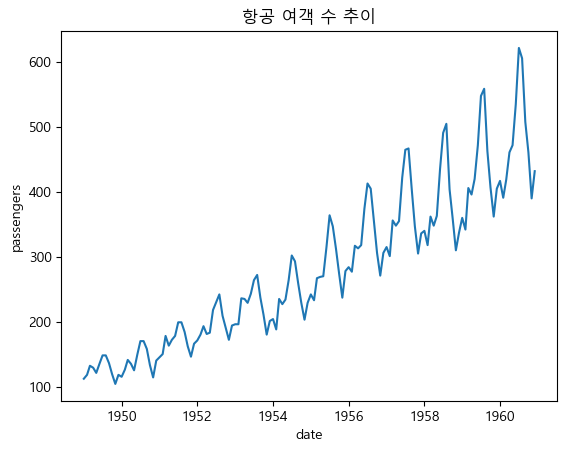

In [53]:
plt.figure()
sns.lineplot(x=flight['date'],y = flight['passengers'])
plt.title("항공 여객 수 추이")
plt.xlabel('date')
plt.ylabel('passengers')
plt.show()

# heatmap 히트맵(Heatmap) 또는 열지도
* 2차원 데이터(행×열) 를 색의 강도로 표현하는 그래프
* 시간 패턴, 계절성, 클러스터링 등을 직관적으로 파악할 때 사용
* 데이터의 크기나 밀도를 색상 차이로 즉시 인식 가능

In [54]:
table = flight.pivot(index='month', columns='year',values='passengers')
table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


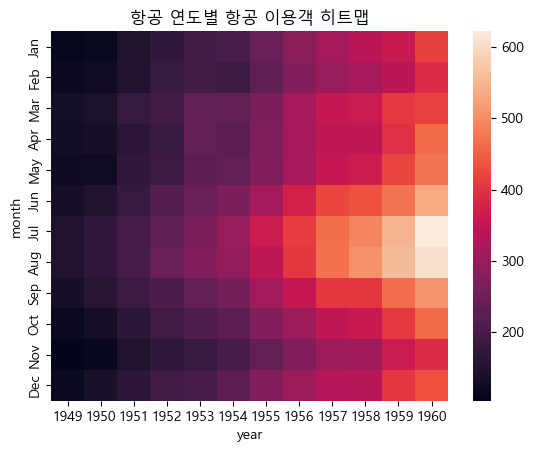

In [55]:
table = flight.pivot(index='month', columns='year',values='passengers')
plt.figure()
sns.heatmap(table,annot=False,fmt='g')
plt.title("항공 연도별 항공 이용객 히트맵")
plt.show()

# iris 불꽃데이터 2dked 분포 그래프 그리기

In [58]:
iris = data['iris'].copy()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [59]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

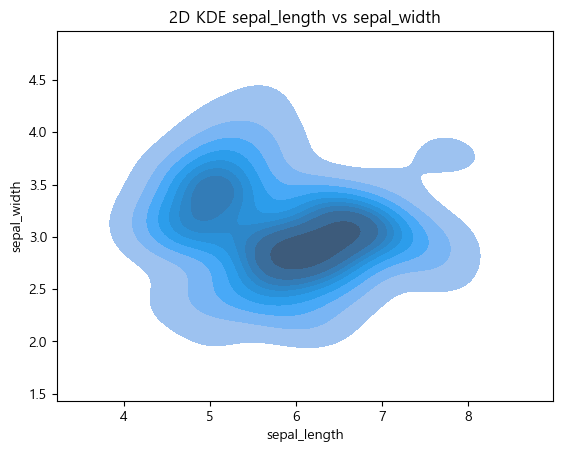

In [74]:
table = flight.pivot(index='month', columns='year',values='passengers')
plt.figure()
sns.kdeplot(data = iris,x='sepal_length',y='sepal_width',fill=True,thresh=0.05)
plt.title("2D KDE sepal_length vs sepal_width")
plt.show()

# Car Crashes - 상관과 회귀 그래프

In [62]:
car = data['car_crashes'].copy()
car.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [64]:
car.columns

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous',
       'ins_premium', 'ins_losses', 'abbrev'],
      dtype='object')

In [68]:
cols = car[['speeding', 'alcohol', 'not_distracted', 'no_previous','ins_premium', 'ins_losses']]

In [70]:
corr = cols.corr()
corr

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
speeding,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


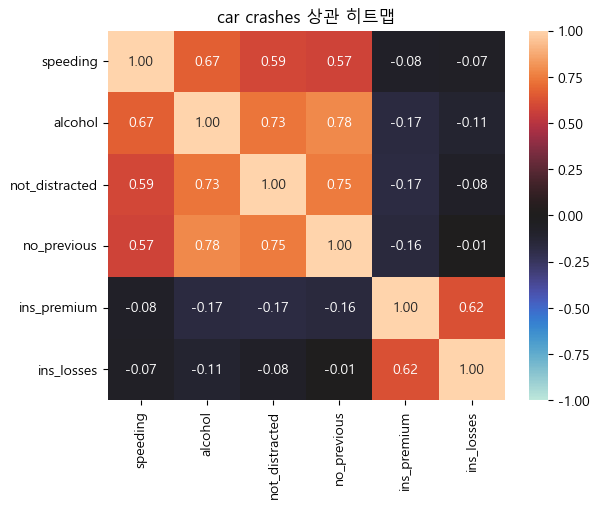

In [71]:
plt.figure()
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,center=0,fmt=".2f")
plt.title("car crashes 상관 히트맵")
plt.show()

# regplot 회귀선 산점도
* 두 연속형 변수 간의 선형 관계를 시각적으로 확인
* 단순한 scatterplot에 회귀선과 신뢰구간을 추가하여
* “x가 증가하면 y가 함께 증가하는가?”를 직관적으로 파악

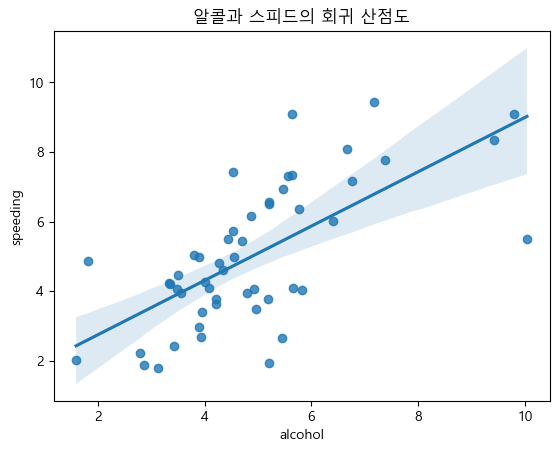

In [75]:
plt.figure()
sns.regplot(data=car, x="alcohol", y="speeding")
plt.title('알콜과 스피드의 회귀 산점도')
plt.show()